# 📈 Model Analysis

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, TweedieRegressor
from sklearn.model_selection import train_test_split
from yellowbrick.datasets import load_bikeshare
from yellowbrick.features import JointPlotVisualizer, Rank2D
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

In [33]:
X, y = load_bikeshare()
X.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


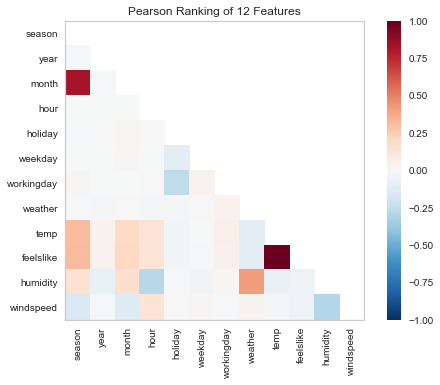

<AxesSubplot:title={'center':'Pearson Ranking of 12 Features'}>

In [6]:
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.show()

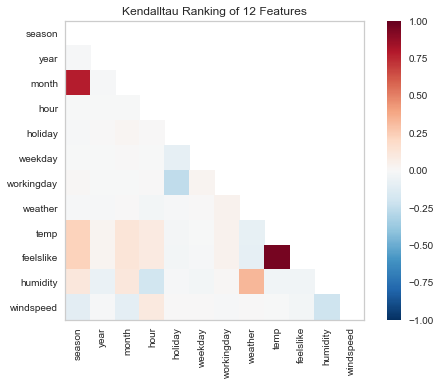

<AxesSubplot:title={'center':'Kendalltau Ranking of 12 Features'}>

In [8]:
visualizer = Rank2D(algorithm="kendalltau")
visualizer.fit_transform(X)
visualizer.show()

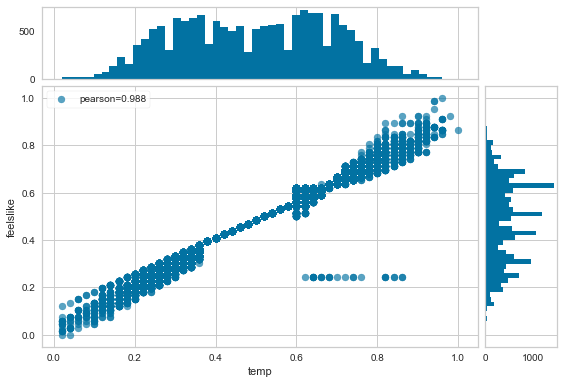

<AxesSubplot:xlabel='temp', ylabel='feelslike'>

In [10]:
visualizer = JointPlotVisualizer(columns=["temp", "feelslike"])
visualizer.fit_transform(X, y)
visualizer.show()

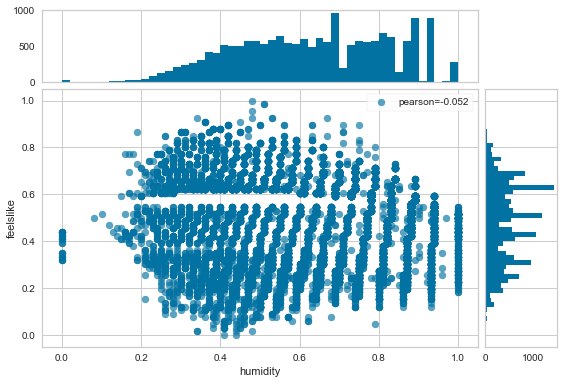

<AxesSubplot:xlabel='humidity', ylabel='feelslike'>

In [11]:
visualizer = JointPlotVisualizer(columns=["humidity", "feelslike"])
visualizer.fit_transform(X, y)
visualizer.show()

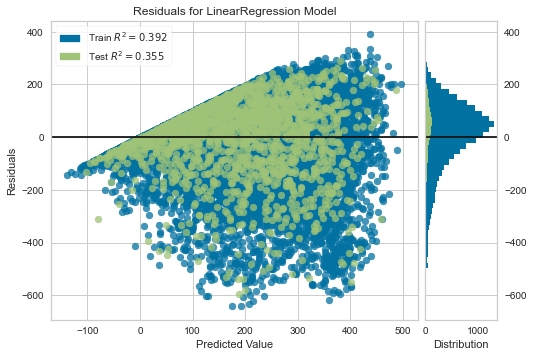

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

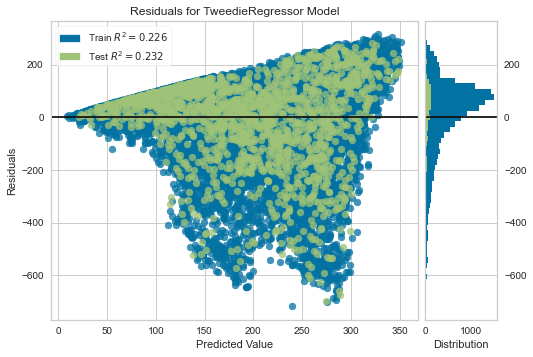

<AxesSubplot:title={'center':'Residuals for TweedieRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [18]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

visualizer = ResidualsPlot(TweedieRegressor())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

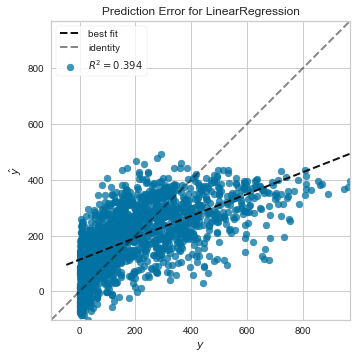

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [28]:
visualizer = PredictionError(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

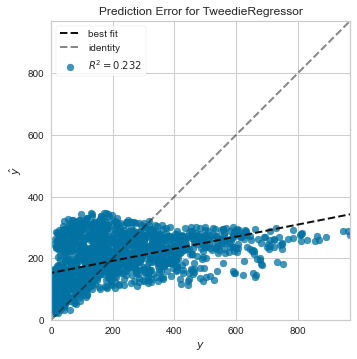

<AxesSubplot:title={'center':'Prediction Error for TweedieRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:
visualizer = PredictionError(TweedieRegressor())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()